<a href="https://colab.research.google.com/github/harrizazham98/DataScienceProj/blob/main/003_engineering_graduate_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE**

A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

from https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/CDLE2.0/data/Engineering_graduate_salary.csv")

In [ ]:
dataset.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

Our data does not have any missing values

In [ ]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
dataset.dtypes.unique() # dtype('int64'), dtype('O'), dtype('float64')

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
#discrete data
int_col = [int_col for int_col in dataset.columns if dataset[int_col].dtypes == "int64"]
print("The data has " + str(len(int_col))+ " int64 types")
print(int_col)

The data has 18 int64 types
['ID', '12graduation', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Salary']


In [ ]:
#continuous data
float_col = [float_col for float_col in dataset.columns if dataset[float_col].dtypes == "float64"]
print("The data has " + str(len(float_col))+ "  float64 types")
print(float_col)

The data has 9  float64 types
['10percentage', '12percentage', 'collegeGPA', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [ ]:
#categorical data
cat_col = [cat_col for cat_col in dataset.columns if dataset[cat_col].dtypes == "O"]
print("The data has " + str(len(cat_col))+ "  categorical types")
print(cat_col)

The data has 7  categorical types
['Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
dataset.describe(include='int64')

,ID,12graduation,CollegeID,CollegeTier,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,2008.080720,5210.210807,1.924616,5210.210807,0.296197,2011.939960,501.066378,500.431621,514.137759,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,3.051748e+05
std,3.648951e+05,1.631814,4776.609877,0.264053,4776.609877,0.456655,36.780582,105.304512,87.299850,122.194955,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,2.123312e+05
min,1.124400e+04,1998.000000,2.000000,1.000000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.500000e+04
25%,3.334648e+05,2007.000000,526.250000,2.000000,526.250000,0.000000,2012.000000,425.000000,441.250000,430.000000,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.800000e+05
50%,6.396945e+05,2008.000000,4027.500000,2.000000,4027.500000,0.000000,2013.000000,500.000000,505.000000,515.000000,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000e+05
75%,9.951770e+05,2009.000000,8822.250000,2.000000,8822.250000,1.000000,2014.000000,570.000000,565.000000,595.000000,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.700000e+05
max,1.297877e+06,2012.000000,18409.000000,2.000000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,4.000000e+06


In [ ]:
dataset.describe(include='float64')

,10percentage,12percentage,collegeGPA,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,74.341061,71.509857,0.508458,-0.038714,0.126217,-0.008662,-0.145965,-0.141111
std,10.002785,11.120299,8.122462,0.463373,1.024974,0.955831,0.962695,1.012901,1.007134
min,43.000000,40.000000,6.630000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700
25%,71.140000,66.000000,66.530000,0.342315,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200
50%,78.965000,74.000000,71.800000,0.622643,0.046400,0.212400,0.091400,-0.172700,-0.094300
75%,85.600000,82.600000,76.300000,0.835612,0.702700,0.812800,0.672000,0.526200,0.502400
max,97.760000,98.700000,99.930000,0.999910,1.995300,1.904800,2.161700,3.352500,1.630200


In [ ]:
dataset.describe(include='O')

,Gender,DOB,10board,12board,Degree,Specialization,CollegeState
count,2998,2998,2998,2998,2998,2998,2998
unique,2,1633,221,277,4,42,26
top,m,1991-07-03,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,2282,7,1026,1039,2757,670,698


In [ ]:
len(dataset.columns)

34

Overall, we have 34 features. 1 for output and 33 for input features

In [ ]:
row, col = dataset.shape
if len(dataset.ID.unique()) == row:
  print("There are no students who register multiple times for this dataset")
else:
  print("You need to check the dataset as there is duplicate ID")

There are no students who register multiple times for this dataset


In [ ]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
dataset.Gender.unique()

array(['f', 'm'], dtype=object)

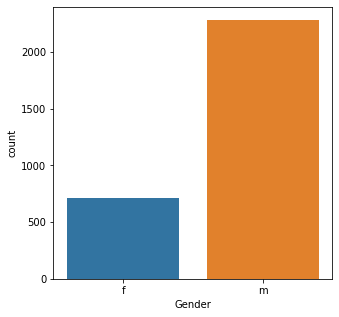

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="Gender", data=dataset)

From the graph, the number of male engineers are higher than the number of female engineers

In [ ]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
dataset["Year"] = dataset["DOB"].str.split('-').str[0]
dataset["Month"] = dataset["DOB"].str.split('-').str[1]
dataset["Day"] = dataset["DOB"].str.split('-').str[2]

In [ ]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
dataset.drop(["DOB"], axis=1, inplace=True) #inplace will dete the specific column permanently

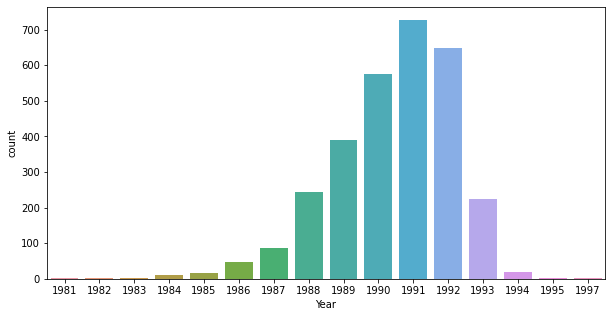

In [ ]:
orderr=dataset["Year"].unique()

plt.figure(figsize=(10,5))
sns.countplot(x="Year", data=dataset,order=sorted(orderr))


From the Year Distribution, most engineers are born between 1988 and 1993

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeID              2998 non-null   int64  
 8   CollegeTier            2998 non-null   int64  
 9   Degree                 2998 non-null   object 
 10  Specialization         2998 non-null   object 
 11  collegeGPA             2998 non-null   float64
 12  CollegeCityID          2998 non-null   int64  
 13  CollegeCityTier        2998 non-null   int64  
 14  CollegeState           2998 non-null   object 
 15  Grad

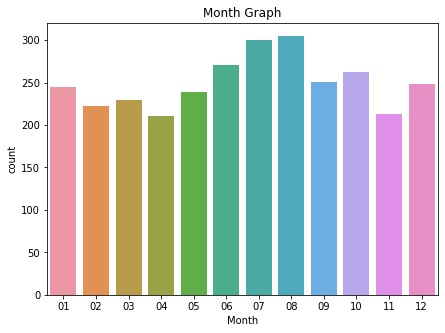

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Month", data=dataset, order = sorted(dataset["Month"].unique()))
plt.title("Month Graph")
plt.show()

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


Analyze between 10percentage and 10board

In [ ]:
len(dataset["10board"].unique())

221

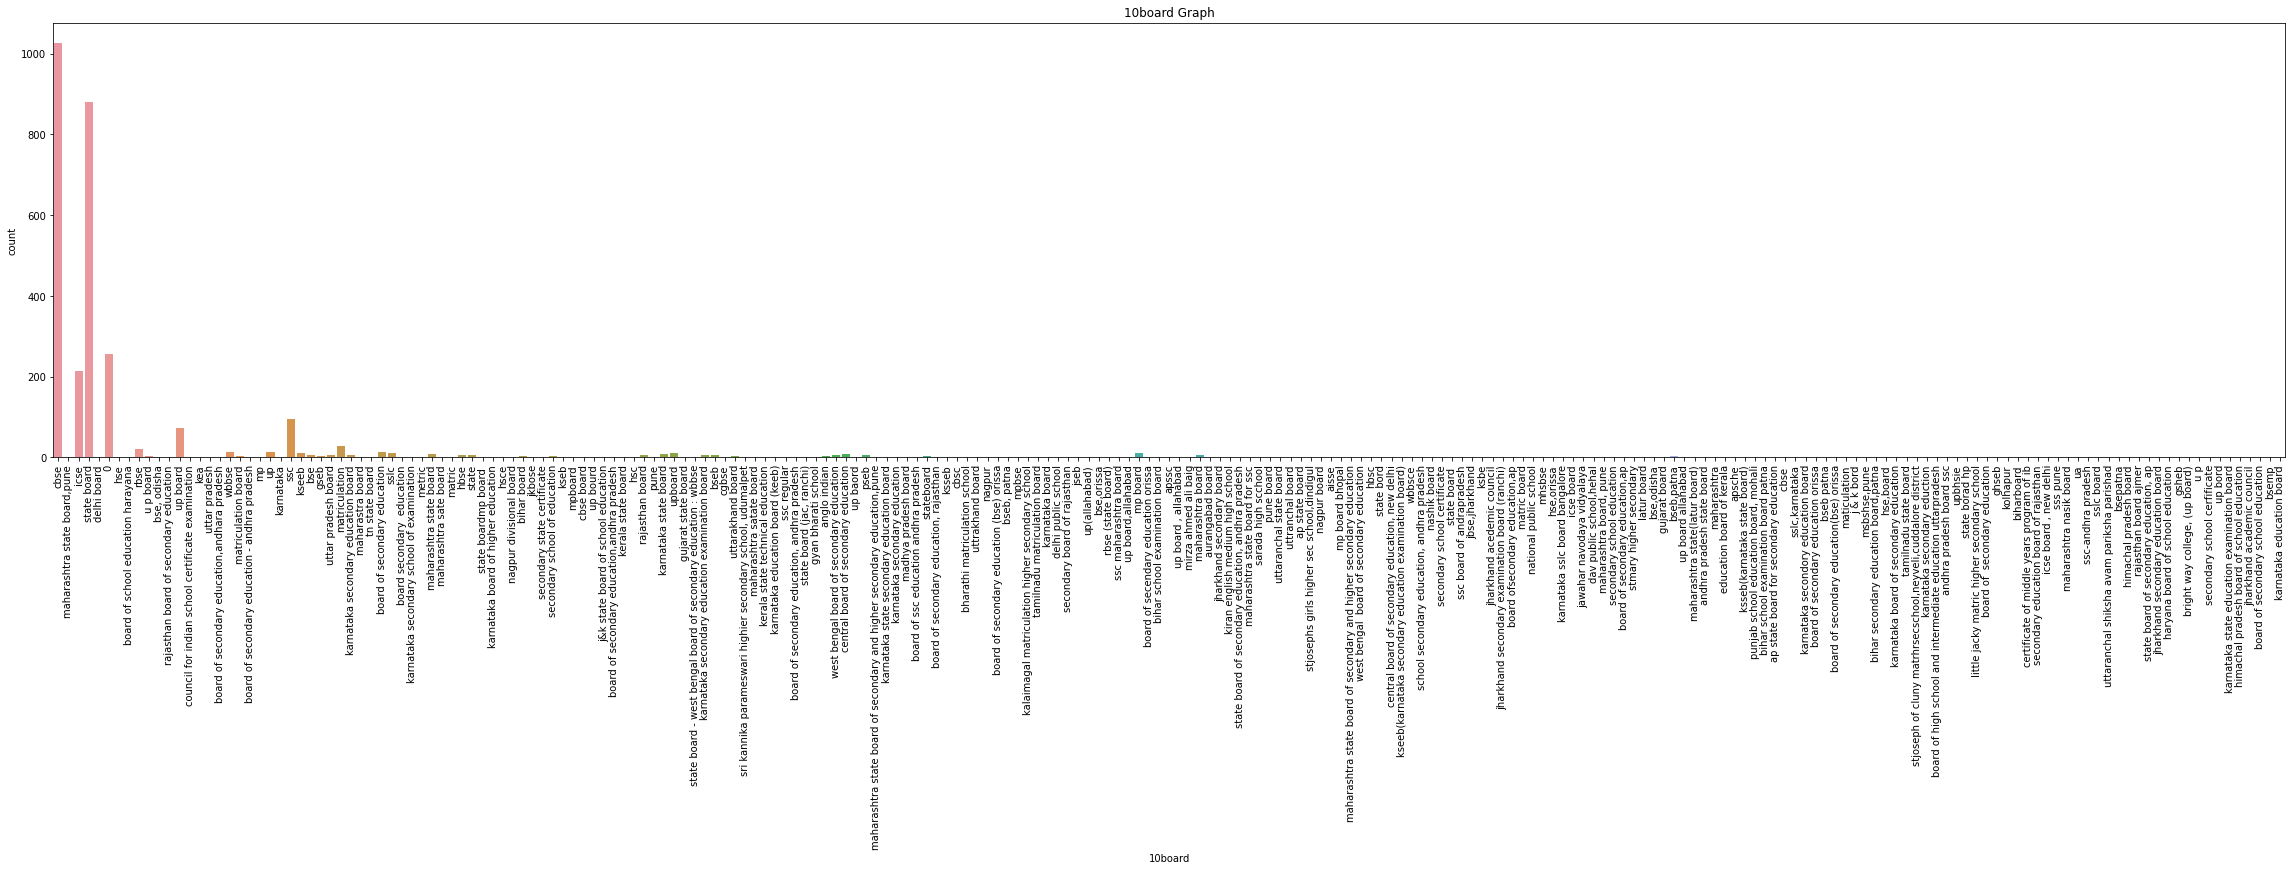

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(x="10board", data=dataset)
plt.title("10board Graph")
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset["10percentage"].describe()

count    2998.000000
mean       77.666264
std        10.002785
min        43.000000
25%        71.140000
50%        78.965000
75%        85.600000
max        97.760000
Name: 10percentage, dtype: float64

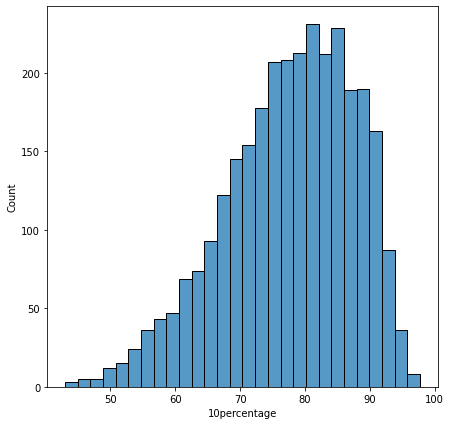

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(dataset["10percentage"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

new_10board = encode.fit_transform(dataset["10board"])
print(new_10board)
print(new_10board.shape)

[ 46  46 129 ...  43  93 180]
(2998,)


(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text major ticklabel objects>)

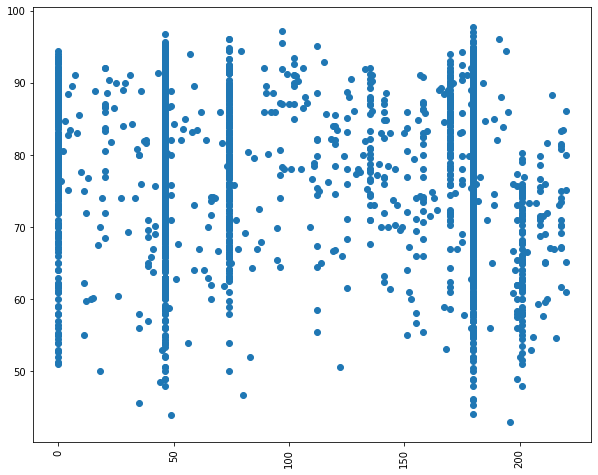

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=new_10board, y=dataset["10percentage"])
plt.xticks(rotation=90)

From scatter plot, it has not relationship between 10board and 10percentage. We may consider to feed in two features to the training

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
print(dataset["12board"].unique())
print(len(dataset["12board"].unique()))

['cbse' 'amravati divisional board' 'state board' 'all india board' '0'
 'chse' 'state board of technical education harayana' 'u p board'
 'rajasthan board of secondary education' 'up board'
 'council for indian school certificate examination' 'kea'
 'board of intermediate education,hyderabad' 'wbchse'
 'hisher seconadry examination(state board)'
 'board fo intermediate education, ap' 'up' 'karnataka state'
 'intermediate board' 'directorate of technical education,banglore'
 'board of intermediate education' 'hsc' 'icse' 'board of intermediate'
 'gsheb' 'uttar pradesh board' 'rbse' 'pre-university board'
 'maharashtra board' 'isc' 'tn state board' 'puc'
 'baord of intermediate education' 'karnataka pre university board'
 'bieap' 'state' 'maharashtra state board' 'intermediate'
 'p u board, karnataka' 'hbse' 'board of intermediate ap' 'andhra board'
 'pu' 'uttar pradesh' 'pre university board of karnataka' 'ssc'
 'madhya pradesh open school' 'nagpur divisional board' 'bihar board'
 'jkb

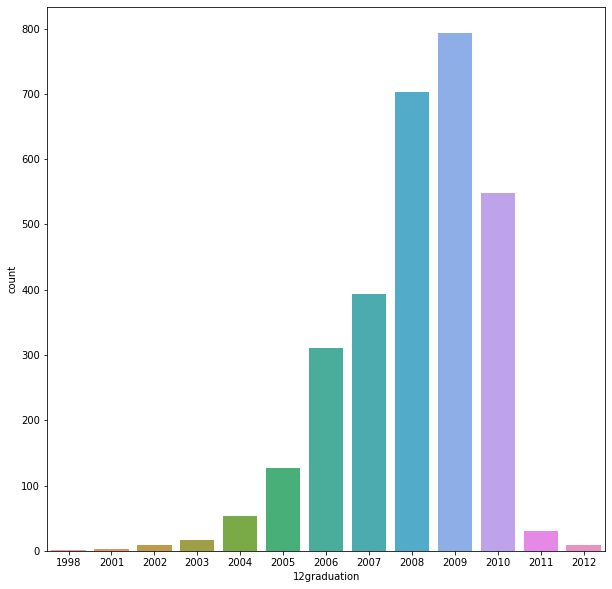

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="12graduation", data=dataset)


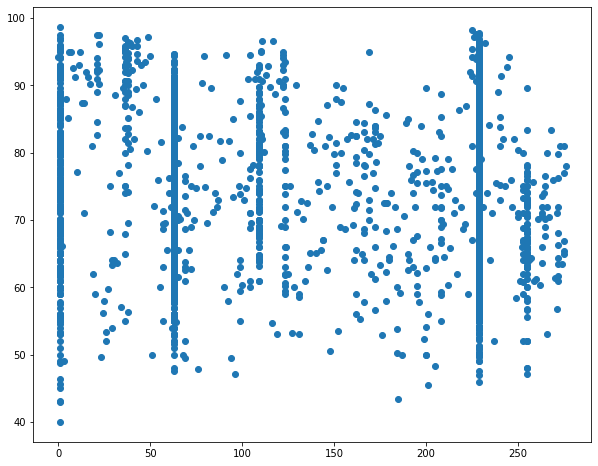

In [ ]:
new_12board =encode.fit_transform(dataset["12board"])
plt.figure(figsize=(10,8))
plt.scatter(x=new_12board, y=dataset["12percentage"])

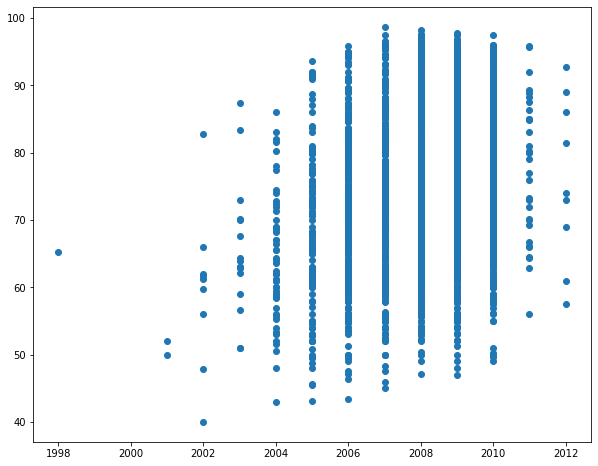

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=dataset["12graduation"], y=dataset["12percentage"])


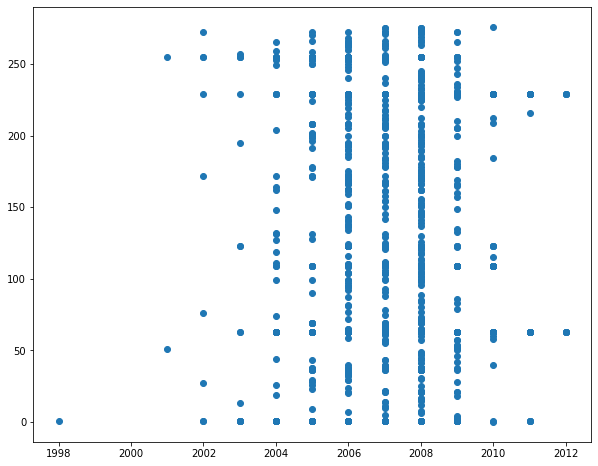

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=dataset["12graduation"], y=new_12board)

For features of 12grduation, 12percentage and 12board, they have no relation among them which we can cosider the features into training.

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
len(dataset.CollegeID.unique())

1173

it means that there are 1173 universities where the students attend

In [ ]:
dataset.CollegeTier.unique()

array([1, 2])

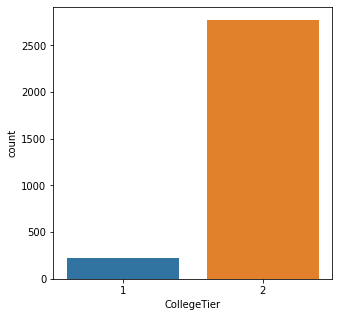

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="CollegeTier", data=dataset)

Most students score lower than threshold for AMCAT score

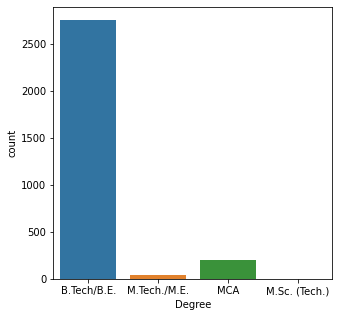

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="Degree", data=dataset)

In [ ]:
dataset.Specialization.nunique()

42

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

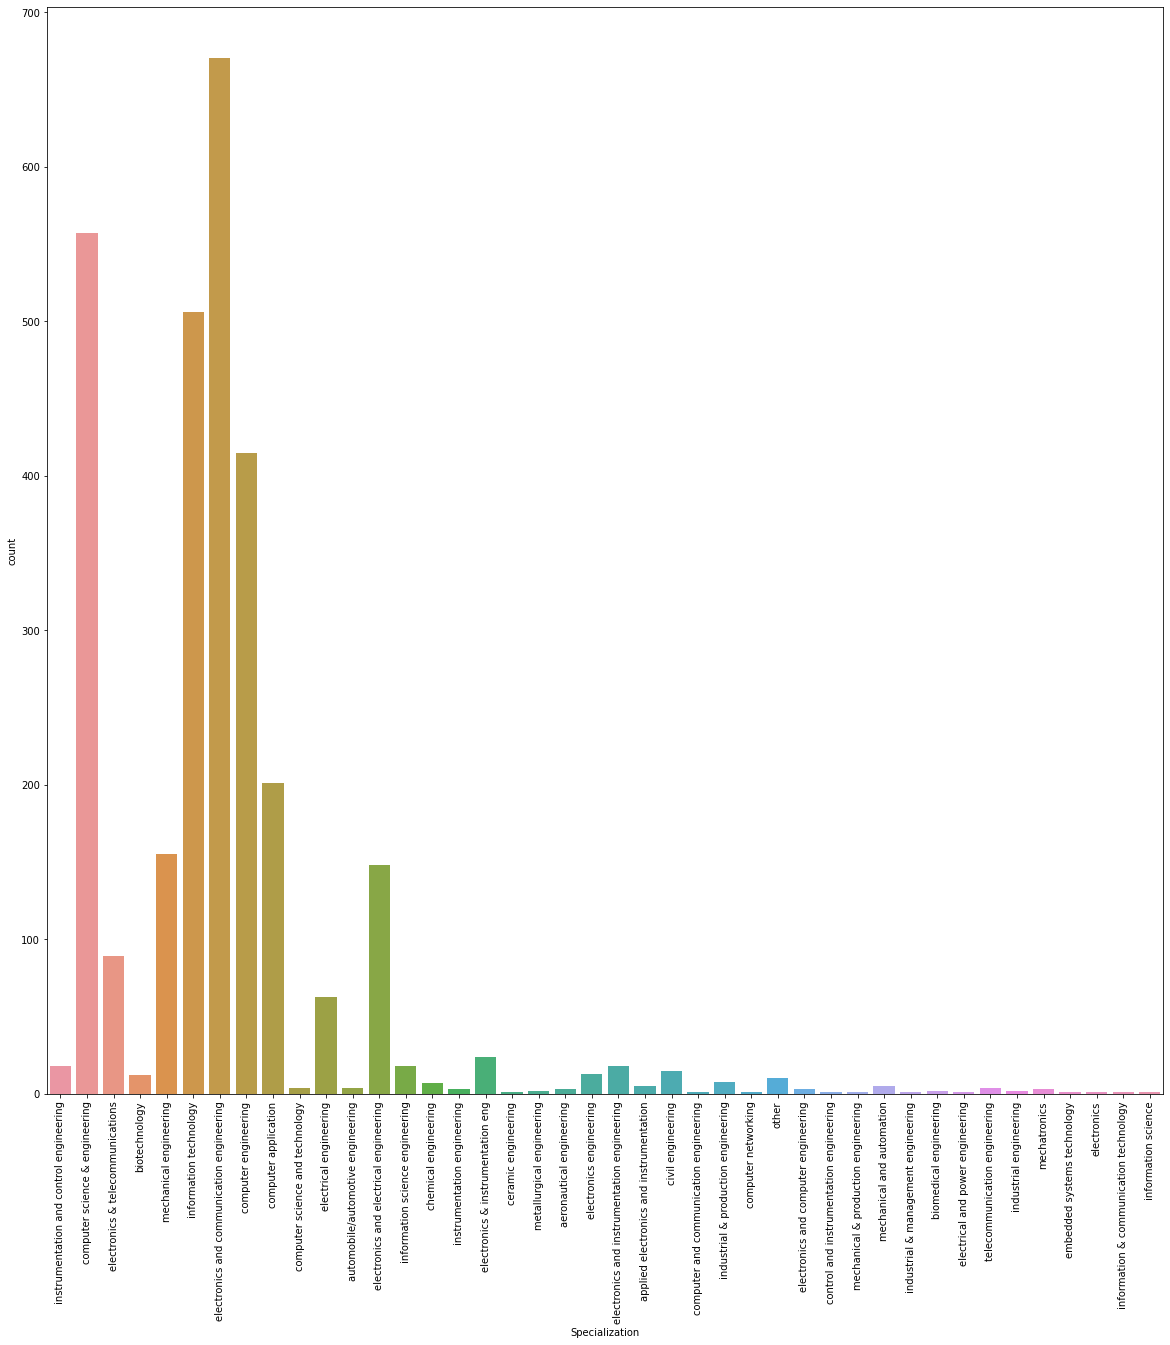

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x="Specialization", data=dataset)
plt.xticks(rotation=90)

From the name of specialization, there are some similarities among them which they can be combined.

In [ ]:
dataset.collegeGPA.unique()

array([73.82, 65.  , 61.94, ..., 76.27, 70.51, 73.19])

In [ ]:
dataset.collegeGPA.max()

99.93

(array([   9.,    0.,    0.,    0.,   11.,  309., 1184., 1219.,  247.,
          19.]),
 array([ 6.63, 15.96, 25.29, 34.62, 43.95, 53.28, 62.61, 71.94, 81.27,
        90.6 , 99.93]),
 <a list of 10 Patch objects>)

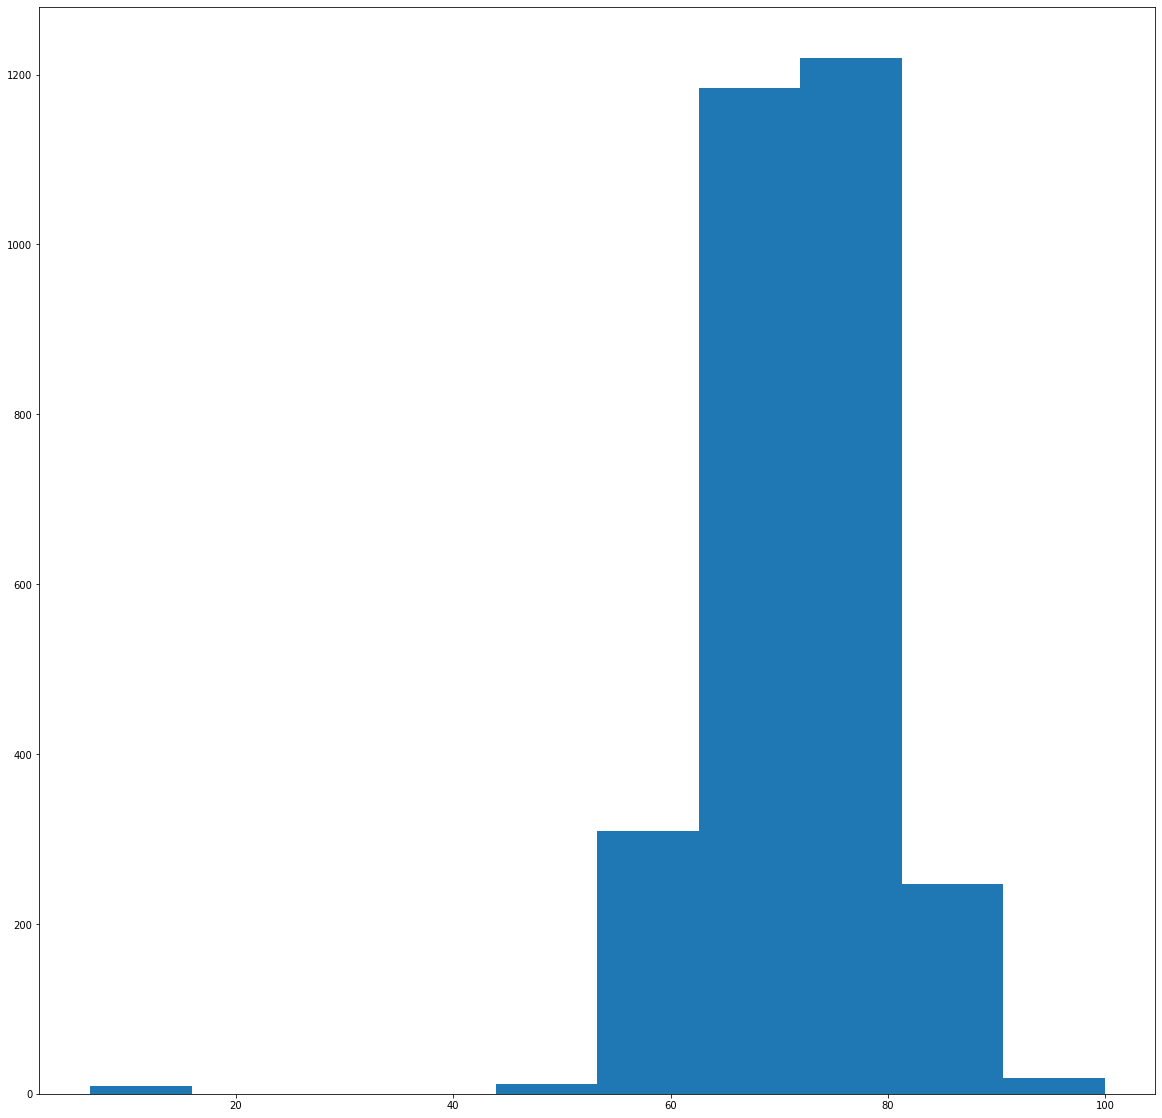

In [ ]:
plt.figure(figsize=(20,20))
plt.hist(dataset.collegeGPA)

The distribution of GPA shows that it is negatively skewed

In [ ]:
dataset.CollegeCityID.nunique()

1173

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
dataset.CollegeCityTier.unique()

array([1, 0])

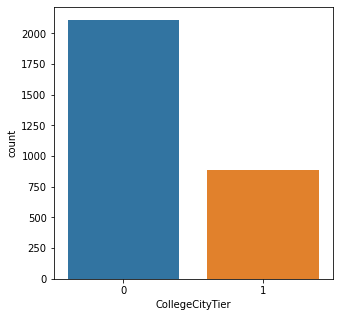

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="CollegeCityTier", data=dataset)

In [ ]:
dataset.CollegeState.nunique()

26

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

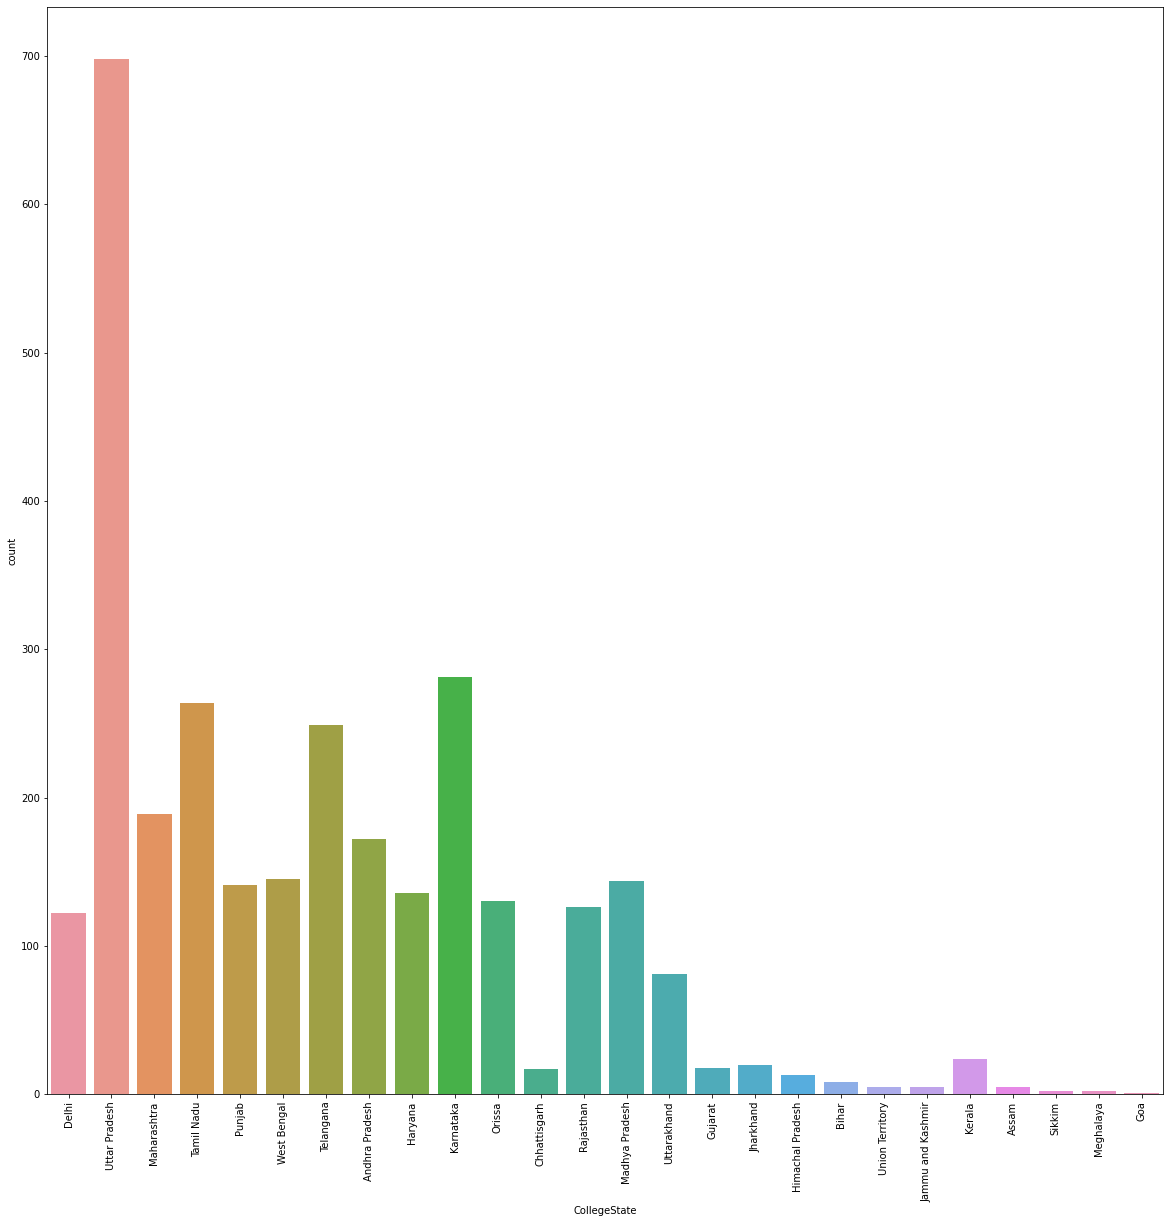

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x="CollegeState", data=dataset)
plt.xticks(rotation=90)

In [ ]:
dataset.GraduationYear.unique()

array([2013, 2014, 2011, 2012, 2010, 2015, 2009, 2017, 2016,    0, 2007])

In [ ]:
dataset.GraduationYear.unique()

array([2013, 2014, 2011, 2012, 2010, 2015, 2009, 2017, 2016,    0, 2007])

In [ ]:
dataset["12graduation"].unique()

array([2009, 2010, 2007, 2008, 2005, 2006, 2003, 2002, 2004, 2012, 2011,
       2001, 1998])

In [ ]:
dataset[dataset.GraduationYear.isin(['0'])]

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
961,794381,m,89.0,cbse,2010,85.2,cbse,8346,2,B.Tech/B.E.,mechanical engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,325000,1991,12,17


From GraduationYear, it has a record of zero. Since it contains one, probably the entire row where Graduation Year is zero will be removed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

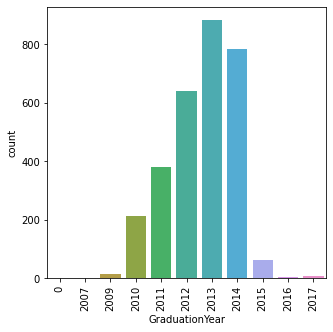

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="GraduationYear", data=dataset)
plt.xticks(rotation=90)

In [ ]:
dataset.shape

(2998, 36)

In [ ]:
index_names = dataset[dataset['GraduationYear'] == 0 ].index
dataset.drop(index_names, inplace=True)

In [ ]:
dataset.shape

(2997, 36)

In [ ]:
dataset.head(10)

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30
5,609356,f,83.16,icse,2007,77.00,cbse,10950,1,M.Tech./M.E.,instrumentation and control engineering,99.93,10950,0,Punjab,2013,535,595,620,0.376060,455,300,-1,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000,1989,12,02
6,1081649,f,72.50,state board,2007,53.20,state board,14381,2,B.Tech/B.E.,mechanical engineering,68.00,14381,1,West Bengal,2013,510,495,405,0.829585,-1,-1,-1,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000,1989,04,17
7,610842,f,77.00,state board,2009,88.00,state board,13208,2,B.Tech/B.E.,computer science & engineering,71.00,13208,1,Telangana,2013,370,470,280,0.704090,465,-1,-1,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000,1991,04,11
8,1183070,m,76.80,state board,2010,87.70,state board,5338,2,B.Tech/B.E.,information technology,73.15,5338,0,Andhra Pradesh,2014,510,555,440,0.744758,525,-1,438,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000,1992,11,25
9,794062,f,57.00,state board,2009,73.00,state board,8346,2,B.Tech/B.E.,computer science & engineering,70.08,8346,0,Uttar Pradesh,2014,500,410,560,0.622643,385,-1,407,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000,1993,03,15


In [ ]:
dataset.ComputerProgramming.unique()

array([485, 365,  -1, 655, 315, 455, 465, 525, 385, 405, 495, 615, 415,
       475, 425, 555, 295, 565, 435, 255, 645, 545, 575, 355, 595, 325,
       335, 445, 515, 464, 165, 395, 605, 535, 305, 285, 375, 625, 345,
       505, 275, 665, 695, 804, 685, 585, 725, 454, 735, 125, 225, 115,
       175, 235, 635, 675, 105, 214, 215, 755, 185, 494, 155, 554, 544,
       705, 195, 145, 265, 334, 404, 715, 394, 524, 135, 245])

In [ ]:
dataset.ElectronicsAndSemicon.unique()

array([366,  -1, 400, 300, 260, 292, 333, 433, 466, 200, 388, 324, 266,
       500, 166, 356, 228, 233, 196, 484, 420, 548, 516, 452, 566, 533,
       612, 133, 164])

In [ ]:
dataset.ElectronicsAndSemicon.isin([-1]).sum()

2132

In [ ]:
dataset.ElectronicsAndSemicon.mean()

96.2605939272606

In [ ]:
dataset.ElectronicsAndSemicon.replace(-1, np.nan)

0       366.0
1         NaN
2       400.0
3         NaN
4         NaN
        ...  
2993    333.0
2994      NaN
2995      NaN
2996      NaN
2997      NaN
Name: ElectronicsAndSemicon, Length: 2997, dtype: float64

In [ ]:
makeItNull = ["ComputerProgramming",	"ElectronicsAndSemicon",	"ComputerScience"	,"MechanicalEngg",	"ElectricalEngg",	"TelecomEngg",	"CivilEngg"]

for col in makeItNull:
  dataset[col].replace(-1, np.nan, inplace=True)


In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485.0,366.0,NaN,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,NaN,400.0,NaN,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputer1=imputer.fit_transform(dataset[makeItNull])

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485.0,366.0,NaN,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,NaN,400.0,NaN,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
new_dataset= pd.DataFrame(imputer1,columns =makeItNull)

In [ ]:
new_dataset.head()

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,485.000000,366.000000,458.333333,428.666667,368.333333,331.000000,344.000000
1,365.000000,351.333333,345.666667,376.333333,270.333333,402.000000,342.666667
2,431.666667,400.000000,335.333333,407.000000,356.000000,260.000000,300.666667
3,655.000000,441.333333,407.333333,415.000000,492.666667,472.666667,318.666667
4,315.000000,282.666667,397.000000,339.666667,396.666667,309.333333,282.000000


In [ ]:
new_dataset.shape

(2997, 7)

In [ ]:
dataset.drop(makeItNull, axis=1,inplace=True)

In [ ]:
result = pd.concat([dataset, new_dataset], axis=1)

In [ ]:
result.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,604399.0,f,87.80,cbse,2009.0,84.00,cbse,6920.0,1.0,B.Tech/B.E.,instrumentation and control engineering,73.82,6920.0,1.0,Delhi,2013.0,650.0,665.0,810.0,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,1990,10,22,485.000000,366.000000,458.333333,428.666667,368.333333,331.000000,344.000000
1,988334.0,m,57.00,cbse,2010.0,64.50,cbse,6624.0,2.0,B.Tech/B.E.,computer science & engineering,65.00,6624.0,0.0,Uttar Pradesh,2014.0,440.0,435.0,210.0,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,1990,05,15,365.000000,351.333333,345.666667,376.333333,270.333333,402.000000,342.666667
2,301647.0,m,77.33,"maharashtra state board,pune",2007.0,85.17,amravati divisional board,9084.0,2.0,B.Tech/B.E.,electronics & telecommunications,61.94,9084.0,0.0,Maharashtra,2011.0,485.0,475.0,505.0,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,1989,08,21,431.666667,400.000000,335.333333,407.000000,356.000000,260.000000,300.666667
3,582313.0,m,84.30,cbse,2009.0,86.00,cbse,8195.0,1.0,B.Tech/B.E.,computer science & engineering,80.40,8195.0,1.0,Delhi,2013.0,675.0,620.0,635.0,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,1991,05,04,655.000000,441.333333,407.333333,415.000000,492.666667,472.666667,318.666667
4,339001.0,f,82.00,cbse,2008.0,75.00,cbse,4889.0,2.0,B.Tech/B.E.,biotechnology,64.30,4889.0,1.0,Tamil Nadu,2012.0,575.0,495.0,365.0,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,1990,10,30,315.000000,282.666667,397.000000,339.666667,396.666667,309.333333,282.000000


In [ ]:
result.shape

(2998, 36)

In [ ]:
result.dropna(inplace=True)

In [ ]:
result.isnull().sum()

ID                       0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
Year                     0
Month                    0
Day                      0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
dtype: int64

In [ ]:
result.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,604399.0,f,87.80,cbse,2009.0,84.00,cbse,6920.0,1.0,B.Tech/B.E.,instrumentation and control engineering,73.82,6920.0,1.0,Delhi,2013.0,650.0,665.0,810.0,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,1990,10,22,485.000000,366.000000,458.333333,428.666667,368.333333,331.000000,344.000000
1,988334.0,m,57.00,cbse,2010.0,64.50,cbse,6624.0,2.0,B.Tech/B.E.,computer science & engineering,65.00,6624.0,0.0,Uttar Pradesh,2014.0,440.0,435.0,210.0,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,1990,05,15,365.000000,351.333333,345.666667,376.333333,270.333333,402.000000,342.666667
2,301647.0,m,77.33,"maharashtra state board,pune",2007.0,85.17,amravati divisional board,9084.0,2.0,B.Tech/B.E.,electronics & telecommunications,61.94,9084.0,0.0,Maharashtra,2011.0,485.0,475.0,505.0,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,1989,08,21,431.666667,400.000000,335.333333,407.000000,356.000000,260.000000,300.666667
3,582313.0,m,84.30,cbse,2009.0,86.00,cbse,8195.0,1.0,B.Tech/B.E.,computer science & engineering,80.40,8195.0,1.0,Delhi,2013.0,675.0,620.0,635.0,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,1991,05,04,655.000000,441.333333,407.333333,415.000000,492.666667,472.666667,318.666667
4,339001.0,f,82.00,cbse,2008.0,75.00,cbse,4889.0,2.0,B.Tech/B.E.,biotechnology,64.30,4889.0,1.0,Tamil Nadu,2012.0,575.0,495.0,365.0,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,1990,10,30,315.000000,282.666667,397.000000,339.666667,396.666667,309.333333,282.000000


In [ ]:
result.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

For Specialization feature, it has 42 unique names and the distribution are non-uniform among them. Also, some courses are almost similar with other courses which make it difficult to seperate among them. However, some unique names show that the specialization has one or more fields that the students enrolled. Therefoe, this Specialization feature will be replace between singe and double speciaalizations.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

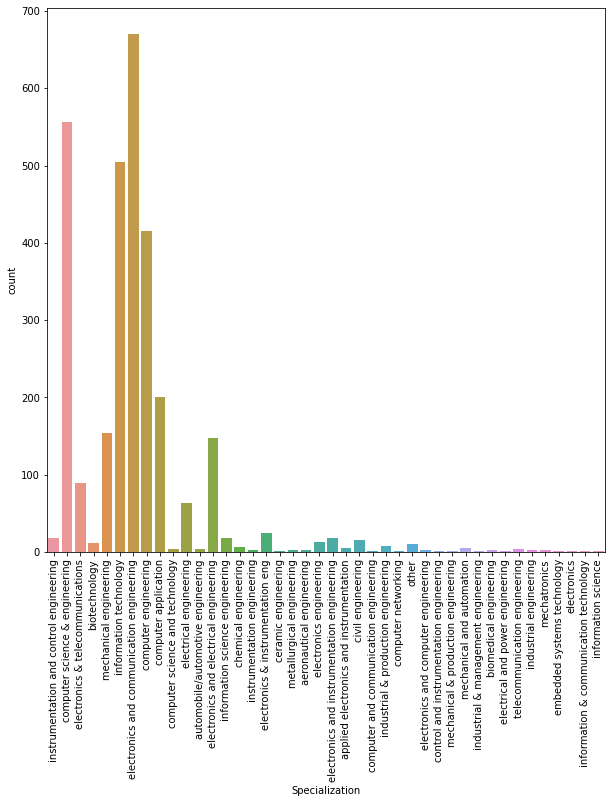

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="Specialization", data=result)
plt.xticks(rotation=90)

In [ ]:
def check_specialization(majoring):
  for major in result.Specialization.unique():
    if majoring in major:
      print(major)
    else:
      pass

In [ ]:
check_specialization("engineering")

instrumentation and control engineering
computer science & engineering
mechanical engineering
electronics and communication engineering
computer engineering
electrical engineering
automobile/automotive engineering
electronics and electrical engineering
information science engineering
chemical engineering
instrumentation engineering
ceramic engineering
metallurgical engineering
aeronautical engineering
electronics engineering
electronics and instrumentation engineering
civil engineering
computer and communication engineering
industrial & production engineering
electronics and computer engineering
control and instrumentation engineering
mechanical & production engineering
industrial & management engineering
biomedical engineering
electrical and power engineering
telecommunication engineering
industrial engineering


In [ ]:
check_specialization("science")

computer science & engineering
computer science and technology
information science engineering
information science


In [ ]:
check_specialization("industrial")

industrial & production engineering
industrial & management engineering
industrial engineering


In [ ]:
check_specialization("electrical")

electrical engineering
electronics and electrical engineering
electrical and power engineering


In [ ]:
check_specialization("electronic")

electronics & telecommunications
electronics and communication engineering
electronics and electrical engineering
electronics & instrumentation eng
electronics engineering
electronics and instrumentation engineering
applied electronics and instrumentation
electronics and computer engineering
electronics


In [ ]:
check_specialization("communication")

electronics & telecommunications
electronics and communication engineering
computer and communication engineering
telecommunication engineering
information & communication technology


In [ ]:
check_specialization("civil")

civil engineering


In [ ]:
check_specialization("computer")

computer science & engineering
computer engineering
computer application
computer science and technology
computer and communication engineering
computer networking
electronics and computer engineering


In [ ]:
check_specialization("info")

information technology
information science engineering
information & communication technology
information science


In [ ]:
single_specialization =[]
double_specialization =[]
for major in result.Specialization.unique():
  if "and" not in major and "&" not in major:
    print(major)
    single_specialization.append(major)
  else:
    double_specialization.append(major)

biotechnology
mechanical engineering
information technology
computer engineering
computer application
electrical engineering
automobile/automotive engineering
information science engineering
chemical engineering
instrumentation engineering
ceramic engineering
metallurgical engineering
aeronautical engineering
electronics engineering
civil engineering
computer networking
other
biomedical engineering
telecommunication engineering
industrial engineering
mechatronics
embedded systems technology
electronics
information science


In [ ]:
len(single_specialization)

24

In [ ]:
len(double_specialization)

18

In [ ]:
result.Specialization.nunique()

42

In [ ]:
double_specialization

['instrumentation and control engineering',
 'computer science & engineering',
 'electronics & telecommunications',
 'electronics and communication engineering',
 'computer science and technology',
 'electronics and electrical engineering',
 'electronics & instrumentation eng',
 'electronics and instrumentation engineering',
 'applied electronics and instrumentation',
 'computer and communication engineering',
 'industrial & production engineering',
 'electronics and computer engineering',
 'control and instrumentation engineering',
 'mechanical & production engineering',
 'mechanical and automation',
 'industrial & management engineering',
 'electrical and power engineering',
 'information & communication technology']

In [ ]:
type(result["Specialization"][0])

str

In [ ]:
result["Specialization"][0]

'instrumentation and control engineering'

In [ ]:
for ix in result.index:
  if "and" not in result["Specialization"][ix] and "&" not in result["Specialization"][ix]:
    result["Specialization"][ix] =0 #single
  else:
    result["Specialization"][ix] =1 #double


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
result.head(10)

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,604399.0,f,87.80,cbse,2009.0,84.00,cbse,6920.0,1.0,B.Tech/B.E.,1,73.82,6920.0,1.0,Delhi,2013.0,650.0,665.0,810.0,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,1990,10,22,485.000000,366.000000,458.333333,428.666667,368.333333,331.000000,344.000000
1,988334.0,m,57.00,cbse,2010.0,64.50,cbse,6624.0,2.0,B.Tech/B.E.,1,65.00,6624.0,0.0,Uttar Pradesh,2014.0,440.0,435.0,210.0,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,1990,05,15,365.000000,351.333333,345.666667,376.333333,270.333333,402.000000,342.666667
2,301647.0,m,77.33,"maharashtra state board,pune",2007.0,85.17,amravati divisional board,9084.0,2.0,B.Tech/B.E.,1,61.94,9084.0,0.0,Maharashtra,2011.0,485.0,475.0,505.0,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,1989,08,21,431.666667,400.000000,335.333333,407.000000,356.000000,260.000000,300.666667
3,582313.0,m,84.30,cbse,2009.0,86.00,cbse,8195.0,1.0,B.Tech/B.E.,1,80.40,8195.0,1.0,Delhi,2013.0,675.0,620.0,635.0,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,1991,05,04,655.000000,441.333333,407.333333,415.000000,492.666667,472.666667,318.666667
4,339001.0,f,82.00,cbse,2008.0,75.00,cbse,4889.0,2.0,B.Tech/B.E.,0,64.30,4889.0,1.0,Tamil Nadu,2012.0,575.0,495.0,365.0,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,1990,10,30,315.000000,282.666667,397.000000,339.666667,396.666667,309.333333,282.000000
5,609356.0,f,83.16,icse,2007.0,77.00,cbse,10950.0,1.0,M.Tech./M.E.,1,99.93,10950.0,0.0,Punjab,2013.0,535.0,595.0,620.0,0.376060,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000.0,1989,12,02,455.000000,300.000000,397.000000,437.666667,429.333333,313.000000,312.000000
6,1081649.0,f,72.50,state board,2007.0,53.20,state board,14381.0,2.0,B.Tech/B.E.,0,68.00,14381.0,1.0,West Bengal,2013.0,510.0,495.0,405.0,0.829585,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000.0,1989,04,17,215.000000,344.000000,366.000000,469.000000,526.333333,249.000000,306.666667
7,610842.0,f,77.00,state board,2009.0,88.00,state board,13208.0,2.0,B.Tech/B.E.,1,71.00,13208.0,1.0,Telangana,2013.0,370.0,470.0,280.0,0.704090,0.1282,0.5454,0.4711,0.90660,-0.2859,105000.0,1991,04,11,465.000000,330.333333,366.000000,375.333333,453.666667,364.666667,312.000000
8,1183070.0,m,76.80,state board,2010.0,87.70,state board,5338.0,2.0,B.Tech/B.E.,0,73.15,5338.0,0.0,Andhra Pradesh,2014.0,510.0,555.0,440.0,0.744758,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000.0,1992,11,25,525.000000,324.000000,438.000000,369.666667,439.333333,503.333333,318.666667
9,794062.0,f,57.00,state board,2009.0,73.00,state board,8346.0,2.0,B.Tech/B.E.,1,70.08,8346.0,0.0,Uttar Pradesh,2014.0,500.0,410.0,560.0,0.622643,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000.0,1993,03,15,385.000000,366.333333,407.000000,461.000000,382.666667,322.000000,300.000000


In [ ]:
dataset.head(10)

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30
5,609356,f,83.16,icse,2007,77.00,cbse,10950,1,M.Tech./M.E.,instrumentation and control engineering,99.93,10950,0,Punjab,2013,535,595,620,0.376060,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000,1989,12,02
6,1081649,f,72.50,state board,2007,53.20,state board,14381,2,B.Tech/B.E.,mechanical engineering,68.00,14381,1,West Bengal,2013,510,495,405,0.829585,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000,1989,04,17
7,610842,f,77.00,state board,2009,88.00,state board,13208,2,B.Tech/B.E.,computer science & engineering,71.00,13208,1,Telangana,2013,370,470,280,0.704090,0.1282,0.5454,0.4711,0.90660,-0.2859,105000,1991,04,11
8,1183070,m,76.80,state board,2010,87.70,state board,5338,2,B.Tech/B.E.,information technology,73.15,5338,0,Andhra Pradesh,2014,510,555,440,0.744758,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000,1992,11,25
9,794062,f,57.00,state board,2009,73.00,state board,8346,2,B.Tech/B.E.,computer science & engineering,70.08,8346,0,Uttar Pradesh,2014,500,410,560,0.622643,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000,1993,03,15


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

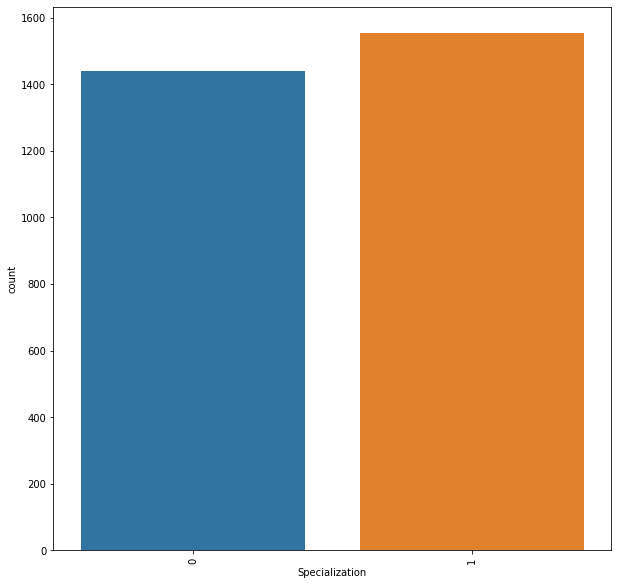

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="Specialization", data=result)
plt.xticks(rotation=90)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2996
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2996 non-null   float64
 1   Gender                 2996 non-null   object 
 2   10percentage           2996 non-null   float64
 3   10board                2996 non-null   object 
 4   12graduation           2996 non-null   float64
 5   12percentage           2996 non-null   float64
 6   12board                2996 non-null   object 
 7   CollegeID              2996 non-null   float64
 8   CollegeTier            2996 non-null   float64
 9   Degree                 2996 non-null   object 
 10  Specialization         2996 non-null   object 
 11  collegeGPA             2996 non-null   float64
 12  CollegeCityID          2996 non-null   float64
 13  CollegeCityTier        2996 non-null   float64
 14  CollegeState           2996 non-null   object 
 15  Grad

In [ ]:
result["Month"].dtypes

dtype('O')

In [ ]:
category = [ category for category in result.columns if result[category].dtypes == "O"]
category

['Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState',
 'Year',
 'Month',
 'Day']

In [ ]:
dataset["10board"].unique()

array(['cbse', 'maharashtra state board,pune', 'icse', 'state board',
       'delhi board', '0', 'hse', 'board of school education harayana',
       'rbse', 'u p board', 'bse, odisha',
       'rajasthan board of secondary education', 'up board',
       'council for indian school certificate examination', 'kea',
       'uttar pradesh', 'board of secondary education,andhara pradesh',
       'wbbse', 'matriculation board',
       'board of secondary education - andhra pradesh', 'mp', 'up',
       'karnataka', 'ssc', 'kseeb', 'bse', 'gseb', 'uttar pradesh board',
       'matriculation', 'karnataka secondary education board',
       'maharastra board', 'tn state board',
       'board of secondary education', 'sslc',
       'board secondary  education',
       'karnataka secondary school of examination', 'metric',
       'maharashtra state board', 'maharashtra sate board', 'matric',
       'hbse', 'state', 'state boardmp board ',
       'karnataka board of higher education', 'hsce',
       '

In [ ]:
dataset["10board"].nunique()

221

In [ ]:
def check_10_board(check_string):
  total=0
  for major in dataset["10board"].unique():
    if check_string in major:
      print(major)
      total+=1
    else:
      pass
  print(total)

In [ ]:
check_10_board("cbse")

cbse
cbse board
cbse 
3


In [ ]:
check_10_board("central")

central board of secondary education
central board of secondary education, new delhi
2


In [ ]:
check_10_board("board")

maharashtra state board,pune
state board
delhi board
board of school education harayana
u p board
rajasthan board of secondary education
up board
board of secondary education,andhara pradesh
matriculation board
board of secondary education - andhra pradesh
uttar pradesh board
karnataka secondary education board
maharastra board
tn state board
board of secondary education
board secondary  education
maharashtra state board
maharashtra sate board
state boardmp board 
karnataka board of higher education
nagpur divisional board
bihar board
mpboard
cbse board
j&k state board of school education
board of secondary education,andhra pradesh
kerala state board
rajasthan board
karnataka state board
upboard
gujarat state board
state board - west bengal board of secondary education : wbbse
karnataka secondary education examination board
uttarakhand board
maharashtra satate board
karnataka education board (keeb)
board of secondary education, andhra pradesh
state board (jac, ranchi)
west bengal board

In [ ]:
check_10_board("state")

maharashtra state board,pune
state board
tn state board
maharashtra state board
state
state boardmp board 
secondary state certificate
j&k state board of school education
kerala state board
karnataka state board
gujarat state board
state board - west bengal board of secondary education : wbbse
kerala state technical education
state board (jac, ranchi)
maharashtra state board of secondary and higher secondary education,pune
karnataka state secondary education board
stateboard
rbse (state board)
state board of secondary education, andhra pradesh
maharashtra state board for ssc
uttaranchal state board
ap state board
maharashtra state board of secondary and higher secondary education
state bord
state board 
maharashtra state(latur board)
andhra pradesh state board
ksseb(karnataka state board)
ap state board for secondary education
tamilnadu state board
state borad hp
state board of secondary education, ap
karnataka state education examination board
33


In [ ]:
check_10_board("west")

state board - west bengal board of secondary education : wbbse
west bengal board of secondary education
west bengal  board of secondary education
3


In [ ]:
check_10_board("state board")

maharashtra state board,pune
state board
tn state board
maharashtra state board
state boardmp board 
j&k state board of school education
kerala state board
karnataka state board
gujarat state board
state board - west bengal board of secondary education : wbbse
state board (jac, ranchi)
maharashtra state board of secondary and higher secondary education,pune
rbse (state board)
state board of secondary education, andhra pradesh
maharashtra state board for ssc
uttaranchal state board
ap state board
maharashtra state board of secondary and higher secondary education
state board 
andhra pradesh state board
ksseb(karnataka state board)
ap state board for secondary education
tamilnadu state board
state board of secondary education, ap
24


In [ ]:
check_10_board("cbse")

cbse
cbse board
cbse 
3


In [ ]:
check_10_board("central board")

central board of secondary education
central board of secondary education, new delhi
2


In [ ]:
check_10_board("icse")

icse
icse board
icse board , new delhi
3


In [ ]:
check_10_board("indian")

council for indian school certificate examination
anglo indian
2


In [ ]:
check_10_board("secondary")

rajasthan board of secondary education
board of secondary education,andhara pradesh
board of secondary education - andhra pradesh
karnataka secondary education board
board of secondary education
board secondary  education
karnataka secondary school of examination
secondary state certificate
secondary school of education
board of secondary education,andhra pradesh
state board - west bengal board of secondary education : wbbse
karnataka secondary education examination board
sri kannika parameswari highier secondary school, udumalpet
board of secondary education, andhra pradesh
west bengal board of secondary education
central board of secondary education
maharashtra state board of secondary and higher secondary education,pune
karnataka state secondary education board
karnataka secondary education
board of secondary education, rajasthan
board of secondary education (bse) orissa
kalaimagal matriculation higher secondary school
secondary board of rajasthan
jharkhand secondary board
state boa

In [ ]:
check_10_board("national")

national public school
1


In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
result[category] = result[category].apply(LabelEncoder().fit_transform)

In [ ]:
result.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,604399.0,0,87.80,46,2009.0,84.00,63,6920.0,1.0,0,1,73.82,6920.0,1.0,4,2013.0,650.0,665.0,810.0,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,9,9,21,485.000000,366.000000,458.333333,428.666667,368.333333,331.000000,344.000000
1,988334.0,1,57.00,46,2010.0,64.50,63,6624.0,2.0,0,1,65.00,6624.0,0.0,23,2014.0,440.0,435.0,210.0,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,9,4,14,365.000000,351.333333,345.666667,376.333333,270.333333,402.000000,342.666667
2,301647.0,1,77.33,129,2007.0,85.17,5,9084.0,2.0,0,1,61.94,9084.0,0.0,14,2011.0,485.0,475.0,505.0,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,8,7,20,431.666667,400.000000,335.333333,407.000000,356.000000,260.000000,300.666667
3,582313.0,1,84.30,46,2009.0,86.00,63,8195.0,1.0,0,1,80.40,8195.0,1.0,4,2013.0,675.0,620.0,635.0,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,10,4,3,655.000000,441.333333,407.333333,415.000000,492.666667,472.666667,318.666667
4,339001.0,0,82.00,46,2008.0,75.00,63,4889.0,2.0,0,0,64.30,4889.0,1.0,20,2012.0,575.0,495.0,365.0,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,9,9,29,315.000000,282.666667,397.000000,339.666667,396.666667,309.333333,282.000000


In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


Text(0.5, 1.0, 'Correlation Map')

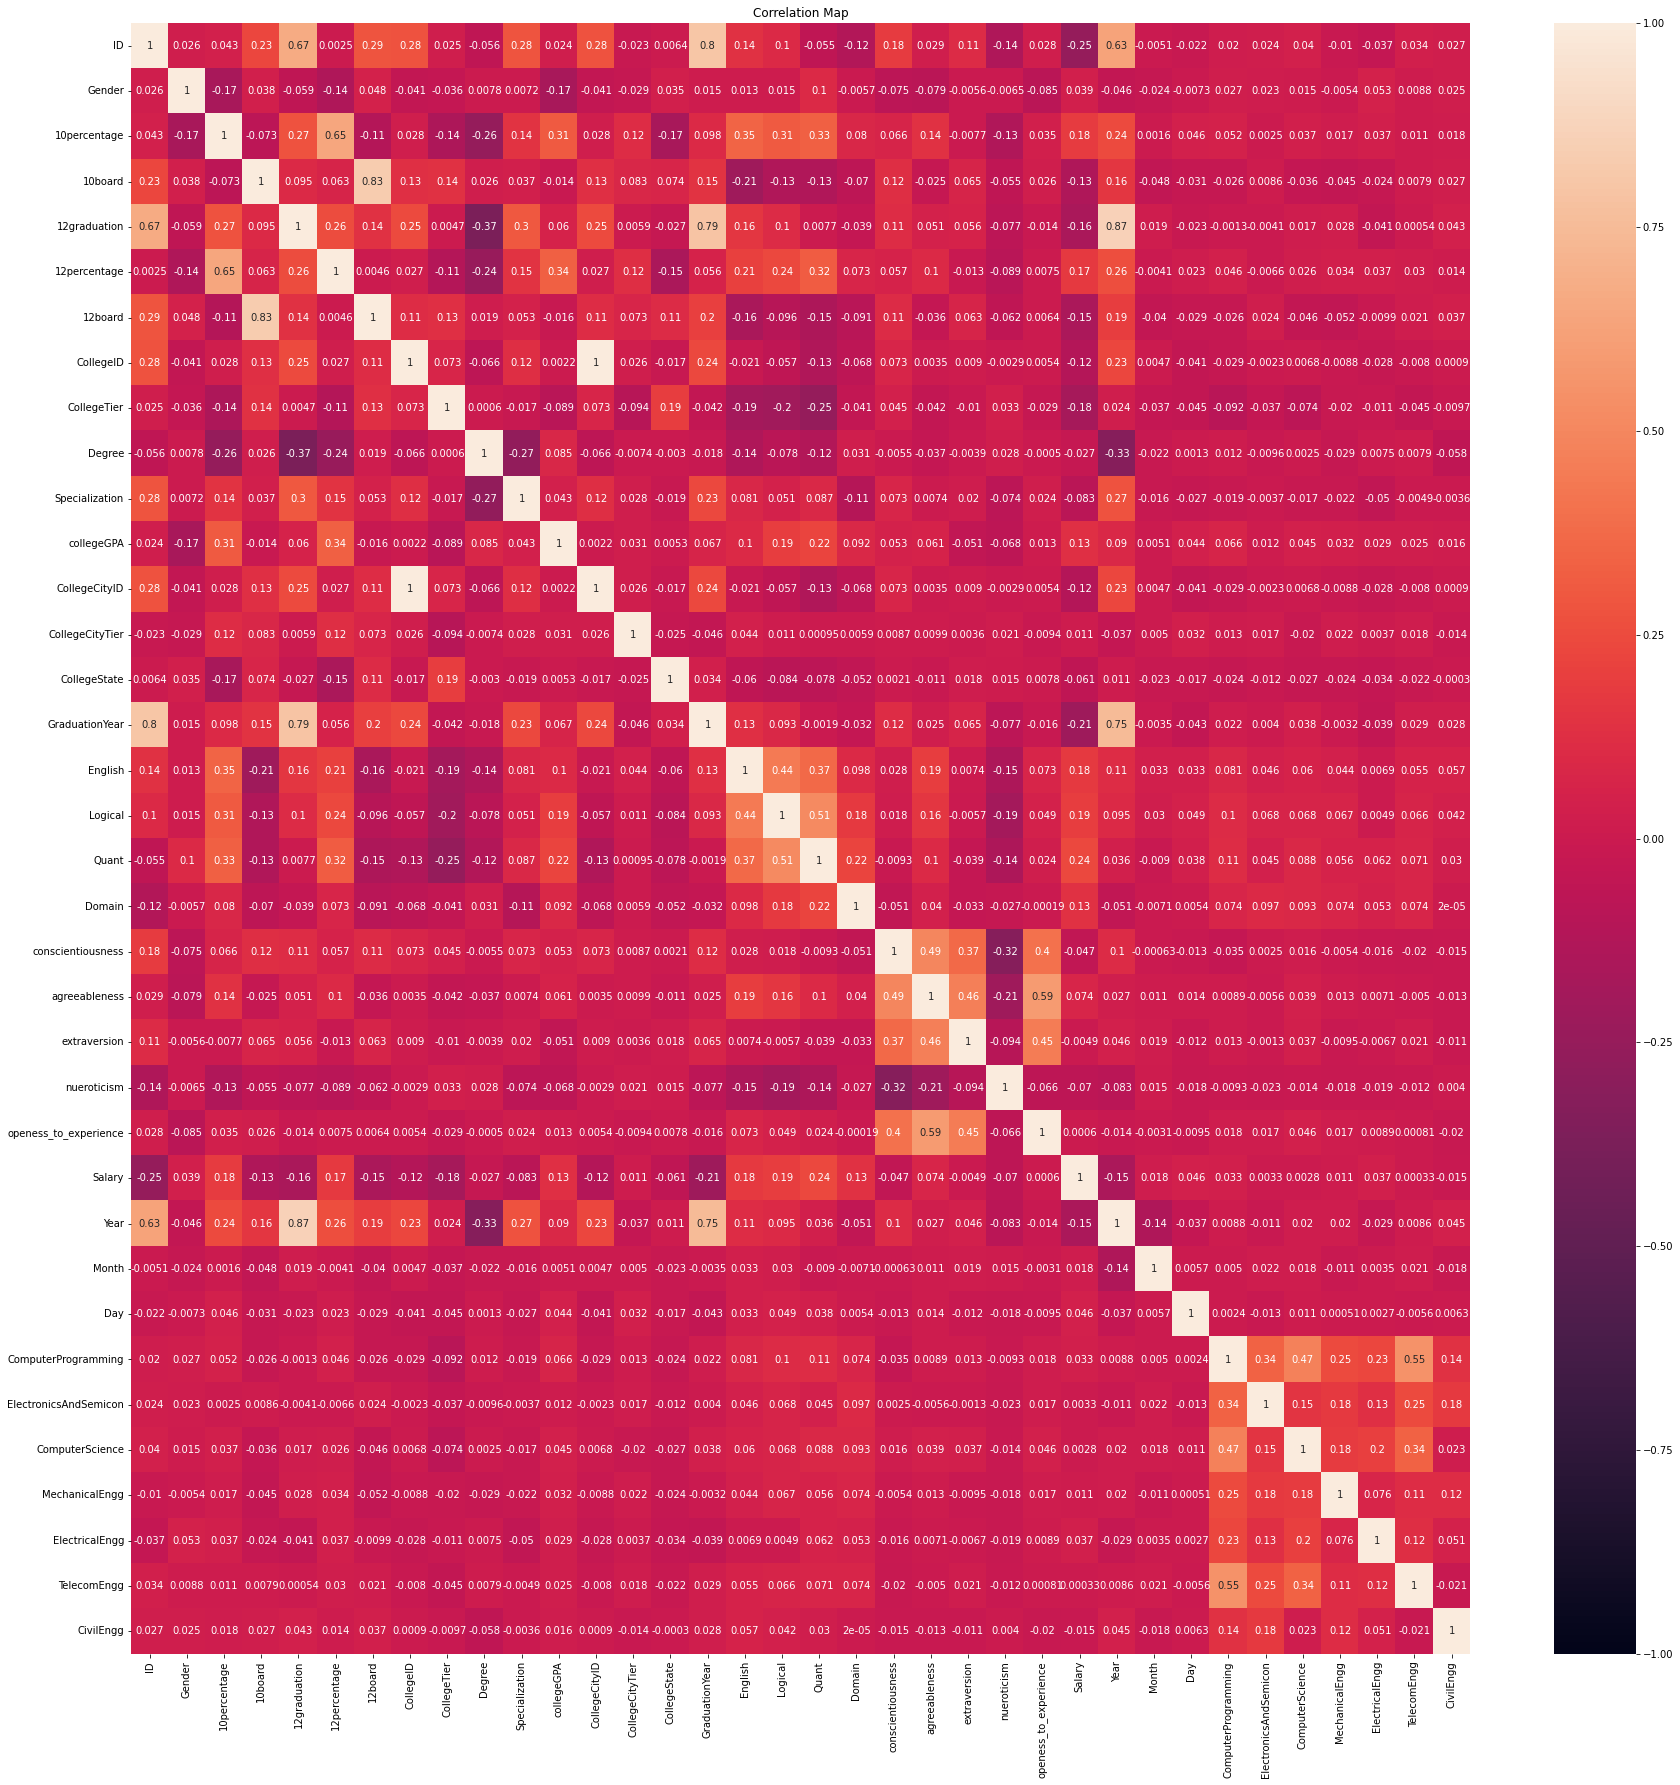

In [ ]:
f_corr = result.corr()
plt.figure(figsize=(30,30))
sns.heatmap(f_corr, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Map", fontdict={'fontsize':12})

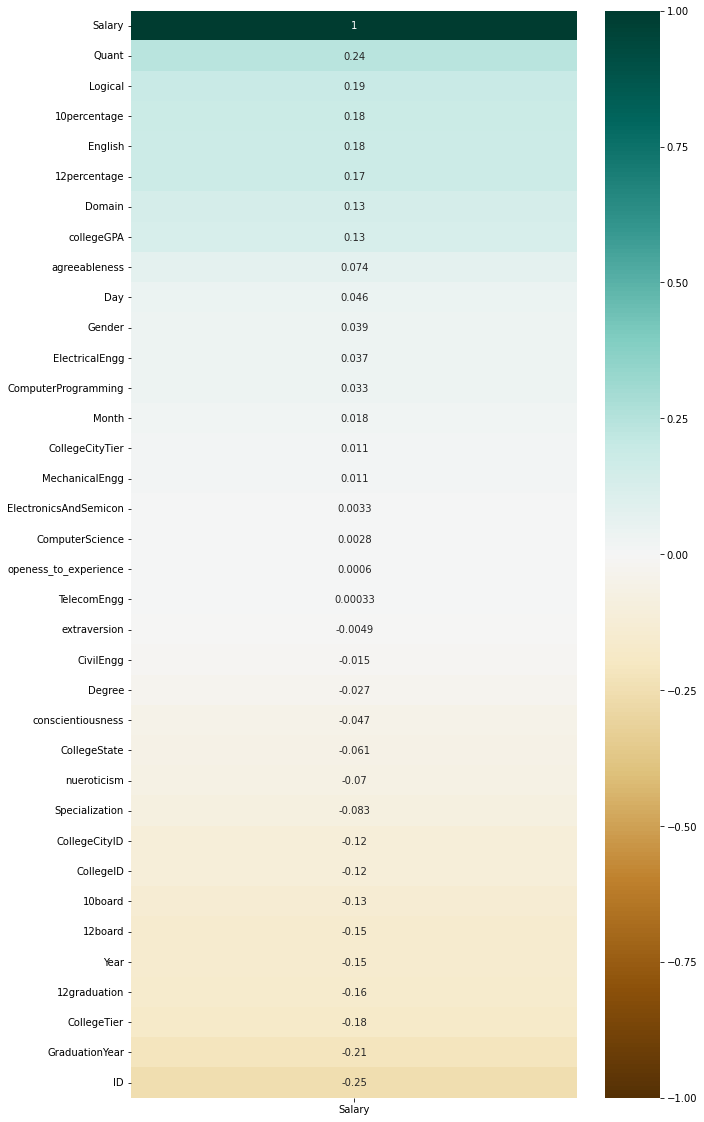

In [ ]:
plt.figure(figsize=(10, 20))
# Correlation between feature and the label itself
heatmap = sns.heatmap(result.corr()[['Salary']].sort_values(
    by='Salary', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
result.shape

(2996, 36)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
df_train = result[0:2546]
df_test = result[2546:]

In [ ]:
X = df_train.drop(["Salary"], axis=1)
Y = df_train.Salary
print(X.shape)
print(Y.shape)

(2546, 35)
(2546,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2036, 35)
(510, 35)
(2036,)
(510,)


In [ ]:
model1=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
model1.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
model1.get_support

<bound method SelectorMixin.get_support of SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))>

In [ ]:
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif

In [ ]:
# for column in dataset[['CollegeID', 'Degree']]:
    
#     # Select column contents by column  
#     # name using [] operator
#     columnSeriesObj = dataset[column]
#     print('Column Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)
#     print(columnSeriesObj.dtypes)
#     print(columnSeriesObj.values[0])

In [ ]:
# for columnC,columnD in zip(dataset[['CollegeID', 'Degree']]):
    
#     # Select column contents by column  
#     # name using [] operator
#     columnSeriesObj = stu_df[column]
#     print('Column Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)

In [ ]:
# n = 30
# dataset['CollegeID'].value_counts()[:n].index.tolist()

In [ ]:
# n=500
# print("Printing the Original Series:")
# display(dataset["CollegeID"])
  
# # counting the frequency of each element
# freq = dataset["CollegeID"].value_counts()[:n]
# print("Printing the frequency")
# display(freq)
  
# # printing the most frequent element
# print("Printing the most frequent element of series")
# display(dataset["CollegeID"].mode());

In [ ]:
# dataset.index

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [ ]:
# for ind in dataset.index:
#   if dataset["CollegeID"][ind] == 272:
#     print("The type of degree is "+ str(dataset["Degree"][ind]))
#     print("The type of specialization is "+ str(dataset["Specialization"][ind]))
#   else:
#     pass

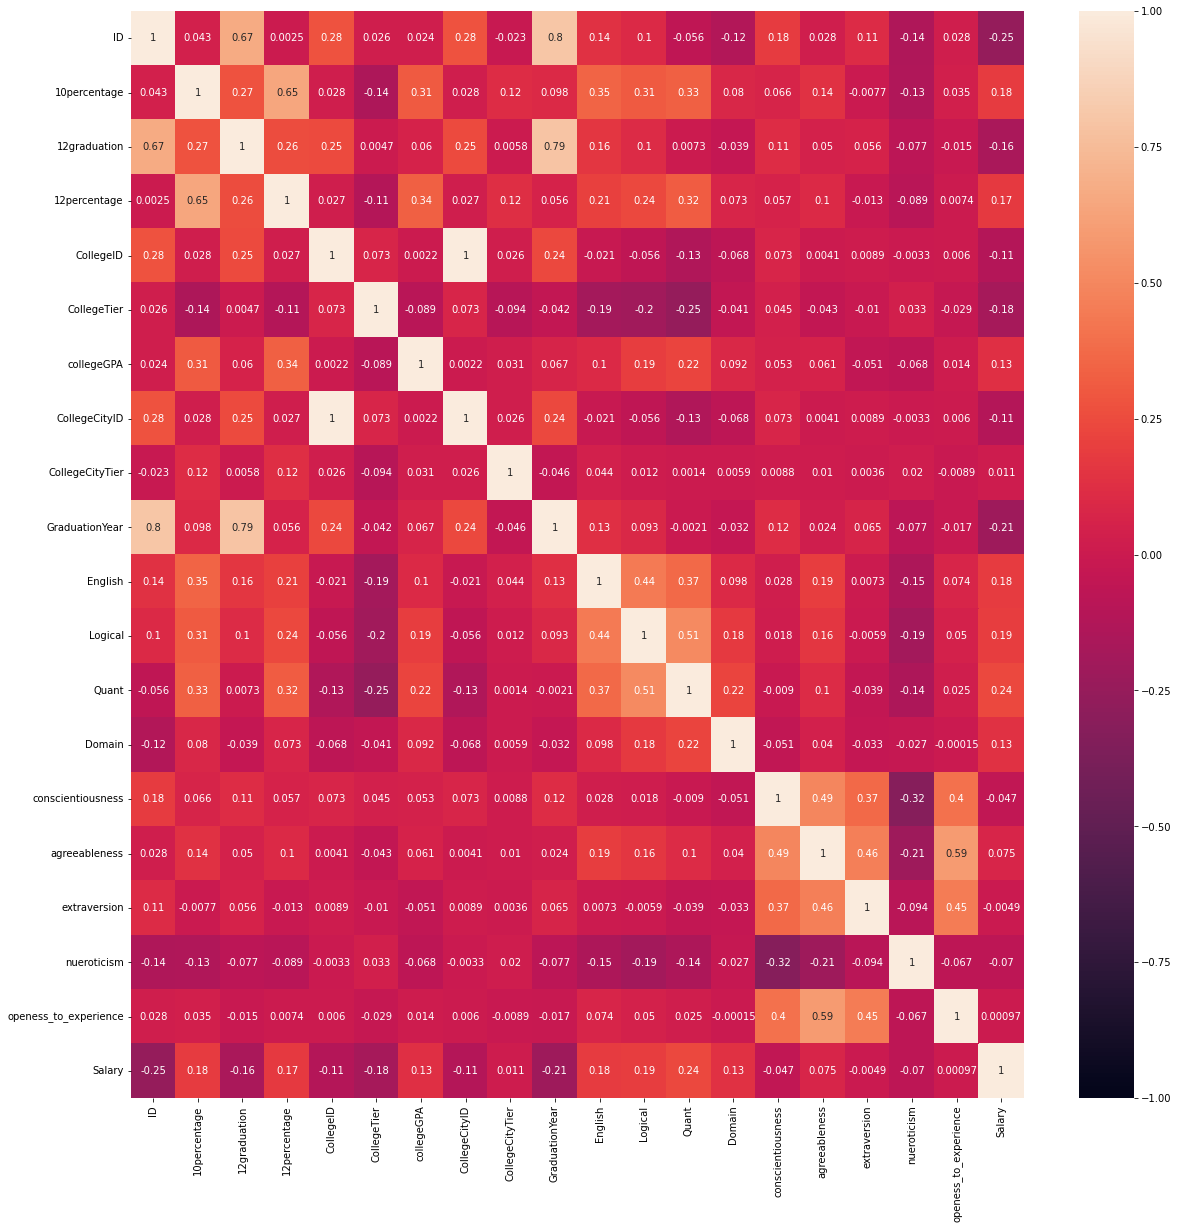

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
dataset.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Year,Month,Day
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,05,15
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,08,21
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,05,04
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


Check on CollegeID